In [138]:
import pandas as pd
from src.data import *
from src.portfolio import *
from src.efficient_frontier import *
import yfinance as yf
from datetime import datetime as dt
from scipy.optimize import Bounds, LinearConstraint

In [120]:
df = pd.read_csv('df_new.csv')

# select columns ending with '_weighted'
weighted_cols = df.columns[df.columns.str.endswith('_weighted')]

# create a new DataFrame with only the weighted columns
df_esg = df[weighted_cols]

# create a new DataFrame with the remaining columns
df_price = (df.drop(weighted_cols, axis=1).set_index('Date'))
df_price.index = pd.to_datetime(df_price.index)
df_price.index = df_price.index.strftime('%Y-%m-%d')

In [121]:
#esg_data = pd.read_excel('ESG_DATA1.xlsx')

#for index, row in esg_data.iterrows():
#    if row['CurrencyCode'] == 'SEK':
#        esg_data.at[index, 'stock_symbol'] += '.ST'
#    elif row['CurrencyCode'] == 'NOK':
#        esg_data.at[index, 'stock_symbol'] += '.OL'
#    elif row['CurrencyCode'] == 'DKK':
#        esg_data.at[index, 'stock_symbol'] += '.CO'

In [122]:
# extract unique stock symbols
#symbols = esg_data['stock_symbol'].unique()

# create a new dataframe to store the monthly closing data
#monthly_close = pd.DataFrame()

# create a new dataframe to store the monthly closing data
#monthly_close_esg = pd.DataFrame()

# create a new dataframe to store the monthly closing data
#monthly_close_total = pd.DataFrame()

# loop over each stock symbol and retrieve monthly data using yfinance
#for symbol in symbols:
    # retrieve data from yfinance
#    stock_data = yf.download(symbol, start='2013-01-01', end='2023-01-01', interval='1mo', progress=False)
    
    # extract the 'Close' column and rename it with the stock symbol
#    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': symbol})
#    monthly_close = pd.concat([monthly_close, stock_data], axis=1)

    # add the weighted score for the stock
#    total_score = esg_data.loc[esg_data['stock_symbol']==symbol, 'total'].iloc[0]
#    monthly_close_esg.index = monthly_close.index
#    monthly_close_esg[symbol + '_ESG_total'] = total_score
    
#    stock_data[symbol + '_ESG_total'] = total_score
    
    # append the stock data to the monthly_close_df
#    monthly_close_total = pd.concat([monthly_close_total, stock_data], axis=1)

# print the result
#print(monthly_close_df)



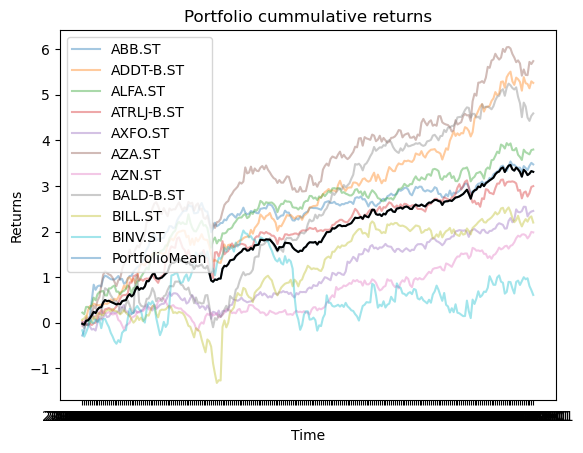

In [123]:
esg = df_esg
price = df_price.iloc[:,:10]
plot_cummulative_portfolio_returns(price)

In [137]:
# set the window size
window_size = 10

# make different lists to append data in every window
expected_return = []
expected_year = []

# setup af loop to iterate through window and make calculations
for i in range(0, 11):

  # define the rolling window
  rolling_window = price[i*12:i*12+(12*window_size)]

  # calculate the expected return as a dataframe
  window_annual_return = annual_return(rolling_window.iloc[0], rolling_window.iloc[-1], window_size)

  # append the results of expected return and the years to list
  expected_return.append(window_annual_return)

# make list of expected return into a dataframe
for x in range(2013, 2024):
  expected_year.append(dt(x,1,1))
  
expected_return = pd.DataFrame(expected_return, index=expected_year)

expected_return

,ABB.ST,ADDT-B.ST,ALFA.ST,ATRLJ-B.ST,AXFO.ST,AZA.ST,AZN.ST,BALD-B.ST,BILL.ST,BINV.ST
2013-01-01,0.227334,0.229424,0.262054,0.180227,0.097737,0.267106,0.074387,0.122392,0.079586,0.025203
2014-01-01,0.174619,0.247319,0.214342,0.163278,0.111008,0.214021,0.075692,0.135225,0.088445,0.026379
2015-01-01,0.181935,0.213116,0.202014,0.152725,0.132216,0.211490,0.119197,0.201929,0.107030,0.029131
2016-01-01,0.110495,0.195084,0.169357,0.139793,0.143514,0.166981,0.098744,0.320970,0.139589,0.028646
2017-01-01,0.098669,0.153812,0.110425,0.097990,0.123161,0.151745,0.086044,0.280255,0.127214,0.020234
2018-01-01,0.091638,0.194361,0.126473,0.123647,0.137246,0.150759,0.121703,0.352633,0.179657,0.011730
2019-01-01,0.100047,0.225033,0.155086,0.130602,0.170232,0.201986,0.120697,0.439984,0.281717,0.012492
2020-01-01,0.102881,0.253166,0.127867,0.158325,0.171919,0.138465,0.141038,0.411140,0.139653,0.005698
2021-01-01,0.095858,0.239795,0.102239,0.116469,0.156649,0.192267,0.138176,0.316074,0.143930,0.007971
2022-01-01,0.131366,0.331899,0.137161,0.132836,0.179235,0.264328,0.155742,0.362784,0.163593,0.012205


In [ ]:
def ef1(ret_port, cov_port):
    bounds = Bounds(-2, 5)

    #Create x0, the first guess at the values of each asset's weight.
    w0 = np.linspace(start=1, stop=0, num=cov_port.shape[1])
    x0 = w0/np.sum(w0)
    # All weights between 0 and 1
    # The second boundary is the sum of weights.
    linear_constraint = LinearConstraint(np.ones((cov_port.shape[1],), dtype=int),1,1)
    options = {'xtol': 1e-07, 'gtol': 1e-07, 'barrier_tol': 1e-07, 'maxiter': 1000}
 
    #These are the weights of the assets in the portfolio with the lowest level of risk possible.
    w_minr = min_risk(cov_port, x0, linear_constraint, bounds)
    opt_risk_ret = portfolio_return(ret_port,w_minr)
    opt_risk_vol = portfolio_std(cov_port, w_minr)
    print(f'Min. Risk = {opt_risk_vol*100:.3f}% => Return: {(opt_risk_ret*100):.3f}%  Sharpe Ratio = {opt_risk_ret/opt_risk_vol:.2f}')

    #These are the weights of the assets in the portfolio with the highest Sharpe ratio.
    w_sr_top = max_sr(ret_port,cov_port, x0, linear_constraint, bounds, options)
    opt_sr_ret = portfolio_return(ret_port, w_sr_top)
    opt_sr_vol = portfolio_std(cov_port, w_sr_top)
    print(f'Max. Sharpe Ratio = {opt_sr_ret/opt_sr_vol:.2f} => Return: {(opt_sr_ret*100):.2f}%  Risk: {opt_sr_vol*100:.3f}%')

    frontier_y = np.linspace(-0.3, opt_sr_ret*3, 50)
    frontier_x = []

    x0 = w_sr_top
    for possible_return in frontier_y:
        cons = ({'type':'eq', 'fun': check_sum},
                {'type':'eq', 'fun': lambda w: portfolio_return(ret_port, w) - possible_return})

        #Define a function to calculate volatility
        fun = lambda w: np.sqrt(np.dot(w,np.dot(w,cov_port)))
        result = minimize(fun,x0,method='SLSQP', bounds=bounds, constraints=cons, callback=callbackF)
        frontier_x.append(result['fun'])

    frontier_x = np.array(frontier_x)
    dt_plot = pd.DataFrame(sr_opt_set, columns=['vol', 'ret'])
    vol_opt = dt_plot['vol'].values
    ret_opt = dt_plot['ret'].values
    sharpe_opt = ret_opt/vol_opt

    return opt_sr_vol, opt_sr_ret, opt_risk_vol,  opt_risk_ret, frontier_x, frontier_y, w_sr_top

In [ ]:
calculate_efficient_frontier_esg()

In [133]:
parameters = []
for i in range(0, 11):
  sr_opt_set = set()
  print(f"-------------------------- 20{3+i:02d}-20{13+i:02d} --------------------------")


  # define the rolling window
  sample_rolling_window = price[i*12:i*12+(12*window_size)]

  ret_port = historical_return(sample_rolling_window, frequency=12)
  print(ret_port)

  ret_port2 = annual_return(sample_rolling_window[0], sample_rolling_window[-1], window_size)
  print(ret_port2)

-------------------------- 2003-2013 --------------------------
ABB.ST        0.212453
ADDT-B.ST     0.214840
ALFA.ST       0.251504
ATRLJ-B.ST    0.156922
AXFO.ST       0.044563
AZA.ST        0.257091
AZN.ST        0.004866
BALD-B.ST     0.081398
BILL.ST       0.014252
BINV.ST      -0.119642
dtype: float64


KeyError: 0

In [ ]:
#mpl.style.use('classic')
mpl.style.use('default')

fig, ax = plt.subplots()
plt.title('Efficient Frontier for rolling windows', fontsize=12)
plt.xlabel('Risk/Volatility')
plt.ylabel('Return')
colors = ['r','b','k','m','g','c', 'lightslategrey', "darkcyan", "purple", "orange", "olive"]
for i, x in enumerate(parameters):
  opt_sr_vol, opt_sr_ret, opt_risk_vol,  opt_risk_ret, frontier_x, frontier_y, _ = x
  #ax.plot(opt_sr_vol, opt_sr_ret,'*', markersize=20, label=f'20{3+i:02d}-20{13+i:02d} Max Sharpe') # red star
  plt.plot(opt_sr_vol,  opt_sr_ret, marker='o', color = f'{colors[i]}', markersize=12)# label=f'20{3+i:02d}-20{13+i:02d} Min var') # red dot
  plt.plot(frontier_x, frontier_y, linestyle='--', color = f'{colors[i]}', linewidth=3, label=f'20{3+i:02d}-20{13+i:02d} Efficient Frontier') # red dashed line
  
  #ax.scatter(x[2], x[1], marker="*", s=100, label=f"20{3+i:02d}-20{13+i:02d} Max Sharpe")
plt.xlim([0,1])
plt.ylim([frontier_y.min(),frontier_y.max()])
plt.legend(bbox_to_anchor =(0.5, 0.9, 1, 0), ncol = 1, fontsize="small")
#fig_path = os.path.join(PLOTS_PATH, f"efficient_frontier.png")
#plt.savefig(fig_path, dpi=150,bbox_inches="tight")
plt.show()

In [ ]:
portfolio_covariance(df)

In [ ]:
portfolio_mean(df)

In [ ]:
cov = portfolio_covariance(df)
portfolio_std(cov, w)

In [ ]:
portfolio_sharp_ratio(df, w, cov)

In [ ]:
#bounds = Bounds(-2, 5)

#Create x0, the first guess at the values of each asset's weight.
#w0 = np.linspace(start=1, stop=0, num=cov.shape[1])
#x0 = w0/np.sum(w0)
# All weights between 0 and 1
# # The second boundary is the sum of weights.
#linear_constraint = LinearConstraint(np.ones((cov.shape[1],), dtype=int),1,1)
#options = {'xtol': 1e-07, 'gtol': 1e-07, 'barrier_tol': 1e-07, 'maxiter': 1000}
 

In [ ]:
def portfolio_minimize_risk(port_return, 
                                port_covariance, 
                                esg_data, 
                                x0,
                                linear_constraint, 
                                bounds, 
                                options = None):
    """
    Function that will take different inputs including esg score data and compute the minimum risk of different portfolios 
    :param: A dataframe of the portfolio covariance matrix
    :param: A dataframe of esg scores of the different assets in portfolio
    :param: x0 argument that is the initial guess for the minimizer
    :param: Linear constraints for the minimizer
    :param: Bounds for the minimizer
    :param: 
    :param: Options for the minimizer
    :returns: A dataframe containing portfolio weight choice for minimizing portfolio risk using esg scores
    """
    
    results = {'esg':[],
               'weights':[],
               'risk':[],
               'return':[]}
    
    function = lambda weight: portfolio_std(port_cov=port_covariance, weights=weight)
    constraint_esg = {'type': 'eq', 'fun': lambda weight: np.dot(weight, esg_data)}
    result = minimize(function, 
                      x0, 
                      method='trust-constr', 
                      bounds=bounds, 
                      constraints=[linear_constraint, constraint_esg], 
                      options=options)
   
    optimal_weights = list(result['x'])
    print(optimal_weights)
    optimal_esg = np.dot(optimal_weights, esg_data)
    results['esg'].append(optimal_esg)
    results['weights'].append(optimal_weights)
    results['risk'].append(result['fun'])
    results['return'].append(np.dot(optimal_weights, port_return.sum()))

    return results


In [ ]:
#portfolio_minimize_risk(df, cov, df_esg, x0, linear_constraint, bounds)

In [ ]:
# set the window size
#window_size = 2

# make different lists to append data in every window
#expected_return = []
#expected_year = []

#def simple_return(beginning_price, end_price):
#  return ((end_price-beginning_price)/beginning_price)

#def annual_return(simple_return, years_held):
#  return (((simple_return+1)**(1/years_held))-1)

# setup af loop to iterate through window and make calculations
#for i in range(0, 6):

  # define the rolling window
#  sample_rolling_window = df[i*12:i*12+(12*window_size)]

  # calculate the expected return as a dataframe
#  window_monthly_returns = pd.DataFrame()
#  window_monthly_returns = sample_rolling_window
#  simple_window_yearly_returns_mean = simple_return(window_monthly_returns.iloc[0], window_monthly_returns.iloc[-1])
#  annual_window_return = annual_return(simple_window_yearly_returns_mean, window_size)

  # append the results of expected return and the years to list
#  expected_return.append(annual_window_return)

# make list of expected return into a dataframe
#for x in range(2013, 2024):
#  expected_year.append(dt(x,1,1))
  
#expected_return = pd.DataFrame(expected_return, index=expected_year)

#expected_return


In [ ]:
#esg_data = pd.read_excel('ESG_DATA.XLS')
#for index, row in esg_data.iterrows():
    # stockholm exchange
    if row['Isin'].startswith('SE'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    
    # swiss exchange
    elif row['Isin'].startswith('CH0242214887'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('CH1122548808'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('CH'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SW'
    
    # toroto exchange
    elif row['Isin'].startswith('CA98936C1068'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    elif row['Isin'].startswith('CA'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.TO'
    elif row['Isin'].startswith('GB'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    
    # paris exchange
    elif row['Isin'].startswith('FR'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.PA'

    # copenhagen exchange
    
    elif row['Isin'].startswith('DK0060668796'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('DK0060520450'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FI4000297767'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO' 
    elif row['Isin'].startswith('DK'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO'

    # oslo exchange
    elif row['Isin'].startswith('NO'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('KYG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL' 
    elif row['Isin'].startswith('CY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('BMG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('MHY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
    elif row['Isin'].startswith('US36467X2062'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('SGX'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FO0000000179'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'

    elif row['Isin'].startswith('MT0000580101'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.DE'
    elif row['Isin'].startswith('MT0001390104'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('MT'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
   